# Finite Difference method for solving discrete Laplace Equation

### Exercise 1: solve the 4x4 linear equation A.x = b

`4*u[i,j] - u[i-1,j] - u[i+1,j] - u[i,j-1] - u[i,j+1] = 0`

Dervie and solve the linear system A.x =b

REF: https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html#scipy.linalg.solve

In [1]:
import numpy as np
from scipy import linalg

In [3]:
a = np.array([[4,-1,-1,0], [-1,4,0,-1], [-1,0,4,-1],[0,-1,-1,4]])
b = np.array([0,0,1,1])
linalg.solve(a,b)

array([0.125, 0.125, 0.375, 0.375])

### Exercise 2: arbitrary size of the matrix.

If we want our solve could sovle an arbitrary size of the system NxN in 2D.\
First, we need to generate the left-hand matrix. \
The left-hand matrix contains two components: One is an diagnoal matrix with only three banded values.\
The other component conatins negative identity matrice.\

we could use the `dia_matrix` in `scipy.sparse` and `np.identity()` for these components.

REF: https://docs.scipy.org/doc/scipy/reference/sparse.html

In [2]:
import numpy as np
from scipy.sparse import diags
from numba import jit, njit, prange, set_num_threads, get_num_threads

Part 1: 

Write a function to generate the matrxi A with arbitrary size N.

Hints: depedning on your implmentation, you might want to use `numba` to speed it up.

In [59]:
def a_mat(n):
    if n ==1: return print("n must be greater than 1")
    N = n*n
    d0 = 4*np.ones(N)
    dp1 = -1*np.ones(n)
    dp1[-1] = 0
    dp1 = np.tile(dp1, n)
    dm1 = -1*np.ones(n)
    dm1[-1] = 0
    dm1 = np.tile(dm1, n)
    dp4 = -1*np.ones(N-n)
    dm4 = -1*np.ones(N-n)
    d = [d0, dp1, dm1, dp4, dm4]
    offsets = [0, 1, -1, n, -n]
    return diags(d, offsets, dtype=np.int8).toarray()

print(a_mat(4))

[[ 4 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0]
 [-1  4 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0]
 [ 0 -1  4 -1  0  0 -1  0  0  0  0  0  0  0  0  0]
 [ 0  0 -1  4  0  0  0 -1  0  0  0  0  0  0  0  0]
 [-1  0  0  0  4 -1  0  0 -1  0  0  0  0  0  0  0]
 [ 0 -1  0  0 -1  4 -1  0  0 -1  0  0  0  0  0  0]
 [ 0  0 -1  0  0 -1  4 -1  0  0 -1  0  0  0  0  0]
 [ 0  0  0 -1  0  0 -1  4  0  0  0 -1  0  0  0  0]
 [ 0  0  0  0 -1  0  0  0  4 -1  0  0 -1  0  0  0]
 [ 0  0  0  0  0 -1  0  0 -1  4 -1  0  0 -1  0  0]
 [ 0  0  0  0  0  0 -1  0  0 -1  4 -1  0  0 -1  0]
 [ 0  0  0  0  0  0  0 -1  0  0 -1  4  0  0  0 -1]
 [ 0  0  0  0  0  0  0  0 -1  0  0  0  4 -1  0  0]
 [ 0  0  0  0  0  0  0  0  0 -1  0  0 -1  4 -1  0]
 [ 0  0  0  0  0  0  0  0  0  0 -1  0  0 -1  4 -1]
 [ 0  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1  4]]


Part2:

The right hand side of the lienar equation is a vecotr.\
generate a vecotr is simple with `np.array()`

In [69]:
def b_vec(n):
    if n ==1: return print("n must be greater than 1")
    N = n*n
    b = np.zeros(N)
    for i in range(n):
        b[-i-1] = 1
    return b

print(b_vec(2))

[0. 0. 1. 1.]


Part 3:

Once we have the linear problem `A x = b`, we could solve the system with `scipy.linalg.solve` 

REF: https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html#scipy.linalg.solve

In [3]:
from scipy import linalg

In [65]:
linalg.solve(a_mat(4), b_vec(4))

array([0.04545455, 0.0719697 , 0.0719697 , 0.04545455, 0.10984848,
       0.17045455, 0.17045455, 0.10984848, 0.22348485, 0.32954545,
       0.32954545, 0.22348485, 0.45454545, 0.59469697, 0.59469697,
       0.45454545])

Part 4:

Once we have the solution, we should convert the solution vector to the finite difference grids `u[i,j]`.

In [70]:
def u_grids(n):
    if n ==1: return print("n must be greater than 1")
    return linalg.solve(a_mat(n), b_vec(n)).reshape(n,n)

Part 5:

Now, let's visualize the solution with `matplotlib`

In [4]:
import matplotlib.pyplot as plt

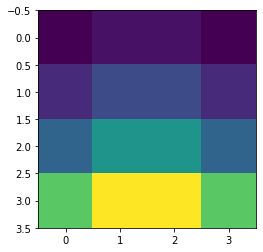

In [73]:
plt.imshow(u_grids(4))

Part 6:

Now we have tested our code, we could write a "solver" function to wrap all necessary codes.\
This solver function could be either in the notebook or in a seperate python file.

In [5]:
def solver(n:int):
    if n <=1: return print("n must be greater than 1")

    N = n*n
    
    d0 = 4*np.ones(N)
    dp1 = -1*np.ones(n)
    dp1[-1] = 0
    dp1 = np.tile(dp1, n)
    dm1 = -1*np.ones(n)
    dm1[-1] = 0
    dm1 = np.tile(dm1, n)
    dpn = -1*np.ones(N-n)
    dmn = -1*np.ones(N-n)
    d = [d0, dp1, dm1, dpn, dmn]
    offsets = [0, 1, -1, n, -n]
    a = diags(d, offsets, dtype=np.int8).toarray()

    b = np.zeros(N)
    for i in range(n):
        b[-i-1] = 1

    return linalg.solve(a, b).reshape(n,n)
    

Part 7:

The buttole neck of this solver is in the `linalg.solve()`.\
Let's measure the performance of `linalg.solve()` with different resolutions.

In [7]:
import time

In [86]:
time_start = time.time()
solver(10)
time_end = time.time()
print(time_end-time_start)

0.3636753559112549


In [78]:
%timeit solver(10)

The slowest run took 4.56 times longer than the fastest. This could mean that an intermediate result is being cached.
68.9 ms ± 41.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Part 8:

Plot Computing time vs N in log-log scale.

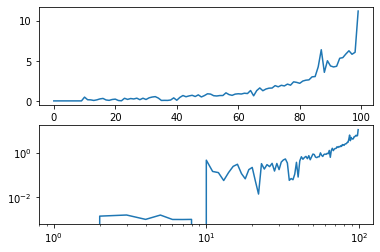

In [100]:
t = np.zeros(100)
for i in range(100):
    if i <= 1: continue
    time_start = time.time()
    solver(i)
    time_end = time.time()
    t[i] = time_end-time_start
plt.figure()
ax1 = plt.subplot(2, 1, 1)
ax1.plot(range(100),t)
ax2 = plt.subplot(2, 1, 2)
ax2.loglog(range(100),t)

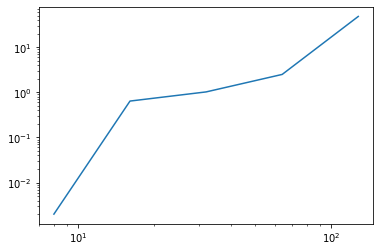

In [11]:
res = [8, 16, 32, 64, 128]
t_res = np.zeros(len(res))

i = 0
for r in res:
    time_start = time.time()
    solver(r)
    time_end = time.time()
    t_res[i] = time_end-time_start
    i += 1

plt.loglog(res,t_res)

You could see that the perofmance is propotional to `N^5`!\
This is becasue the size of the matrix A is proportional to `N^2` and\
the calculation time of `linalg.solve(M,b)` is proportial to the cubic of the size of M, N^3,\
giving `N^5` at the end.

The `scipy.linalg.solve` is robust, but since the matrix A is a sparse matrix, we could use special method to solve it.

REF: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.spsolve.html

In [13]:
from scipy.sparse import csc_matrix
import scipy.sparse.linalg as splinalg

In [14]:
def sp_solver(n:int):
    if n <=1: return print("n must be greater than 1")

    N = n*n
    
    d0 = 4*np.ones(N)
    dp1 = -1*np.ones(n)
    dp1[-1] = 0
    dp1 = np.tile(dp1, n)
    dm1 = -1*np.ones(n)
    dm1[-1] = 0
    dm1 = np.tile(dm1, n)
    dpn = -1*np.ones(N-n)
    dmn = -1*np.ones(N-n)
    d = [d0, dp1, dm1, dpn, dmn]
    offsets = [0, 1, -1, n, -n]
    a = diags(d, offsets, dtype=np.int8).toarray()
    a_csc = csc_matrix(a)

    b = np.zeros(N)
    for i in range(n):
        b[-i-1] = 1

    return splinalg.spsolve(a_csc, b).reshape(n,n)

sp_solver(2)

array([[0.125, 0.125],
       [0.375, 0.375]])

Let's measure the performance again with `spsolve()`

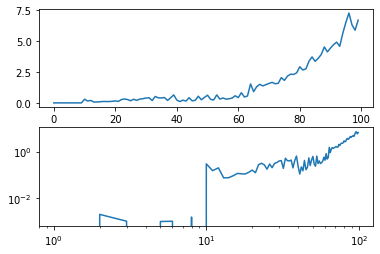

In [101]:
sp_t = np.zeros(100)
for i in range(100):
    if i <= 1: continue
    time_start = time.time()
    solver(i)
    time_end = time.time()
    sp_t[i] = time_end-time_start
plt.figure()
ax1 = plt.subplot(2, 1, 1)
ax1.plot(range(100),sp_t)
ax2 = plt.subplot(2, 1, 2)
ax2.loglog(range(100),sp_t)

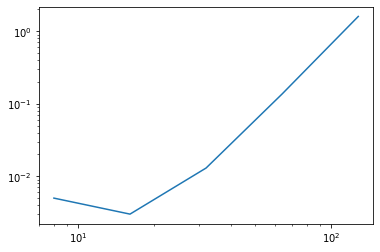

In [15]:
spres = [8, 16, 32, 64, 128]
t_spres = np.zeros(len(res))

i = 0
for r in spres:
    time_start = time.time()
    sp_solver(r)
    time_end = time.time()
    t_spres[i] = time_end-time_start
    i += 1

plt.loglog(spres,t_spres)

You got several oreders of speedup if you know the matrix is a sparse matrix.

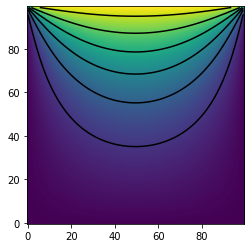

In [139]:
plt.imshow(sp_solver(100), origin='lower')
plt.contour(sp_solver(100), colors='k')